In [1]:
from sift import *
from VFX_HW2 import *

In [2]:
name = 'library_mid'
# name = 'parrington'
data_path = 'data/' + name # 'parrington'# 
file_name = data_path + f'/{name}.txt' #'pano_list.txt'#
# file_name = data_path + '/pano_list.txt'

In [3]:
imglist, focals = parse(data_path, file_name)

In [4]:
imglist = imglist[1:]
focals = focals[1:]

In [5]:
# cylinderImgs = [cylinderProject(imglist[i], focals[i]) for i in range(len(imglist))]
pool = mp.Pool(mp.cpu_count()//2)
cylinderImgs = pool.starmap(cylinderProject, [(imglist[i], focals[i]) for i in range(len(imglist))])
cylinderImgs = [cv2.resize(i, (i.shape[1]//2, i.shape[0]//2)) for i in cylinderImgs]
grayImgs = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in cylinderImgs]
kp_des = pool.starmap(SIFT, [(i, 1.6, 5, 4, None, .3) for i in grayImgs])
# kp_des = [SIFT(i) for i in grayImgs]

Removed: 1, Remained: 1
Removed: 0, Remained: 1
Removed: 0, Remained: 0
Skip 1
Removed: 6, Remained: 84
Removed: 0, Remained: 0
Skip 1
Removed: 0, Remained: 0
Skip 1
Removed: 1, Remained: 1
Removed: 0, Remained: 0
Skip 1Removed: 5, Remained: 30
Removed: 6, Remained: 110

Removed: 276, Remained: 4421
Removed: 11, Remained: 280Removed: 0, Remained: 0

Removed: 13, Remained: 655Skip 1
Removed: 15, Remained: 283
Removed: 55, Remained: 1014

Removed: 2, Remained: 15Removed: 147, Remained: 1857
Removed: 953, Remained: 5419

Removed: 4, Remained: 20Removed: 366, Remained: 1723

Removed: 314, Remained: 5815
Removed: 294, Remained: 2809
Removed: 77, Remained: 1912
Removed: 595, Remained: 6664Removed: 15, Remained: 309

Removed: 124, Remained: 1928
Removed: 55, Remained: 1108
Removed: 376, Remained: 5050
Removed: 259, Remained: 3987
Removed: 119, Remained: 1106
Removed: 66, Remained: 929Removed: 244, Remained: 5098Removed: 104, Remained: 2002


Removed: 198, Remained: 4519Removed: 984, Remained:

In [6]:
xshape = 0
shifts = []
ConcateImg = cylinderImgs[0].copy()
for i in range(1, len(cylinderImgs)):
    print(f"========================{i-1}")
    r_image = cylinderImgs[i-1]
    xshape += r_image.shape[1]

    l_image = cylinderImgs[i]
    shifts.append(stitch(*kp_des[i], *kp_des[i-1], min_matches=30))
    ConcateImg = blend(l_image, ConcateImg, shifts[-1])
    print("==========================================================")
cv2.imwrite('output.jpg', ConcateImg)

========================0
Insufficient Matches: 8, threshold=0.75
Insufficient Matches: 18, threshold=0.8
Good Matches: 68, threshold=0.8500000000000001
shift
[0 0]
========================1
Insufficient Matches: 13, threshold=0.75
Insufficient Matches: 26, threshold=0.8
Good Matches: 78, threshold=0.8500000000000001
shift
[935  37]
========================2
Insufficient Matches: 25, threshold=0.75
Good Matches: 48, threshold=0.8
shift
[940  40]
========================3
Insufficient Matches: 8, threshold=0.75
Insufficient Matches: 24, threshold=0.8
Good Matches: 88, threshold=0.8500000000000001
shift
[931  36]
========================4
Insufficient Matches: 5, threshold=0.75
Insufficient Matches: 15, threshold=0.8
Good Matches: 50, threshold=0.8500000000000001
shift
[658 281]
========================5
Insufficient Matches: 10, threshold=0.75
Insufficient Matches: 26, threshold=0.8
Good Matches: 77, threshold=0.8500000000000001
shift
[1056   42]
========================6
Good Matches: 

True

In [7]:
mimg = [i.astype(np.float32)/255 for i in cylinderImgs]
gimgs = []
for i in range(len(mimg)-1):
    gimg = queryPoints([kp_des[i+1][1], kp_des[i][1]], [kp_des[i+1][0], kp_des[i][0]], min_matches=-1, ret_match_img=mimg[i:i+2][::-1])[2]
    gimgs.append(gimg[..., ::-1])

Good Matches: 8, threshold=0.75
Good Matches: 13, threshold=0.75
Good Matches: 25, threshold=0.75
Good Matches: 8, threshold=0.75
Good Matches: 5, threshold=0.75
Good Matches: 10, threshold=0.75
Good Matches: 50, threshold=0.75
Good Matches: 41, threshold=0.75
Good Matches: 45, threshold=0.75
Good Matches: 32, threshold=0.75
Good Matches: 7, threshold=0.75
Good Matches: 10, threshold=0.75


""

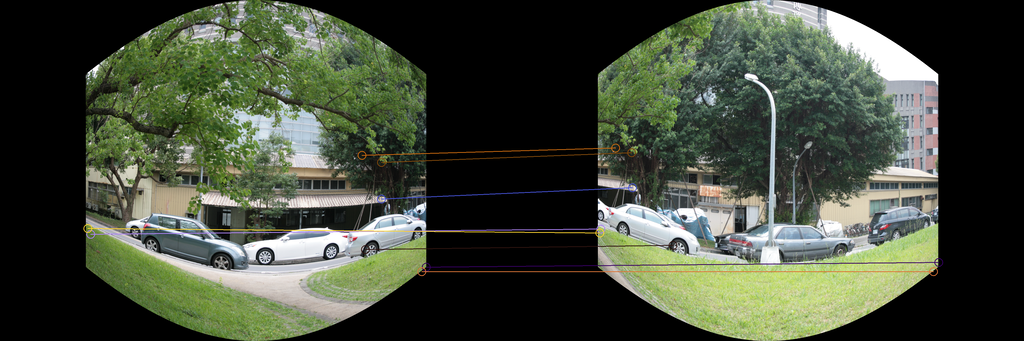

In [8]:
media.show_image(gimgs[0], width=1024)
# media.show_images(gimgs, columns=1, width=1024)
# for i in gimgs:
    # media.show_image(i, width=1024)